## PCA(주성분 분석)  
--- 
- 전체 특성(Feature)에서 주요 특성 압축/융합하는 비지도 학습
- fit() + transfrom() 2단계 거쳐 주성분 분석

In [ ]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix

### [1] 데이터 준비

In [ ]:
X, y = load_iris(return_X_y=True, as_frame = True)

In [ ]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

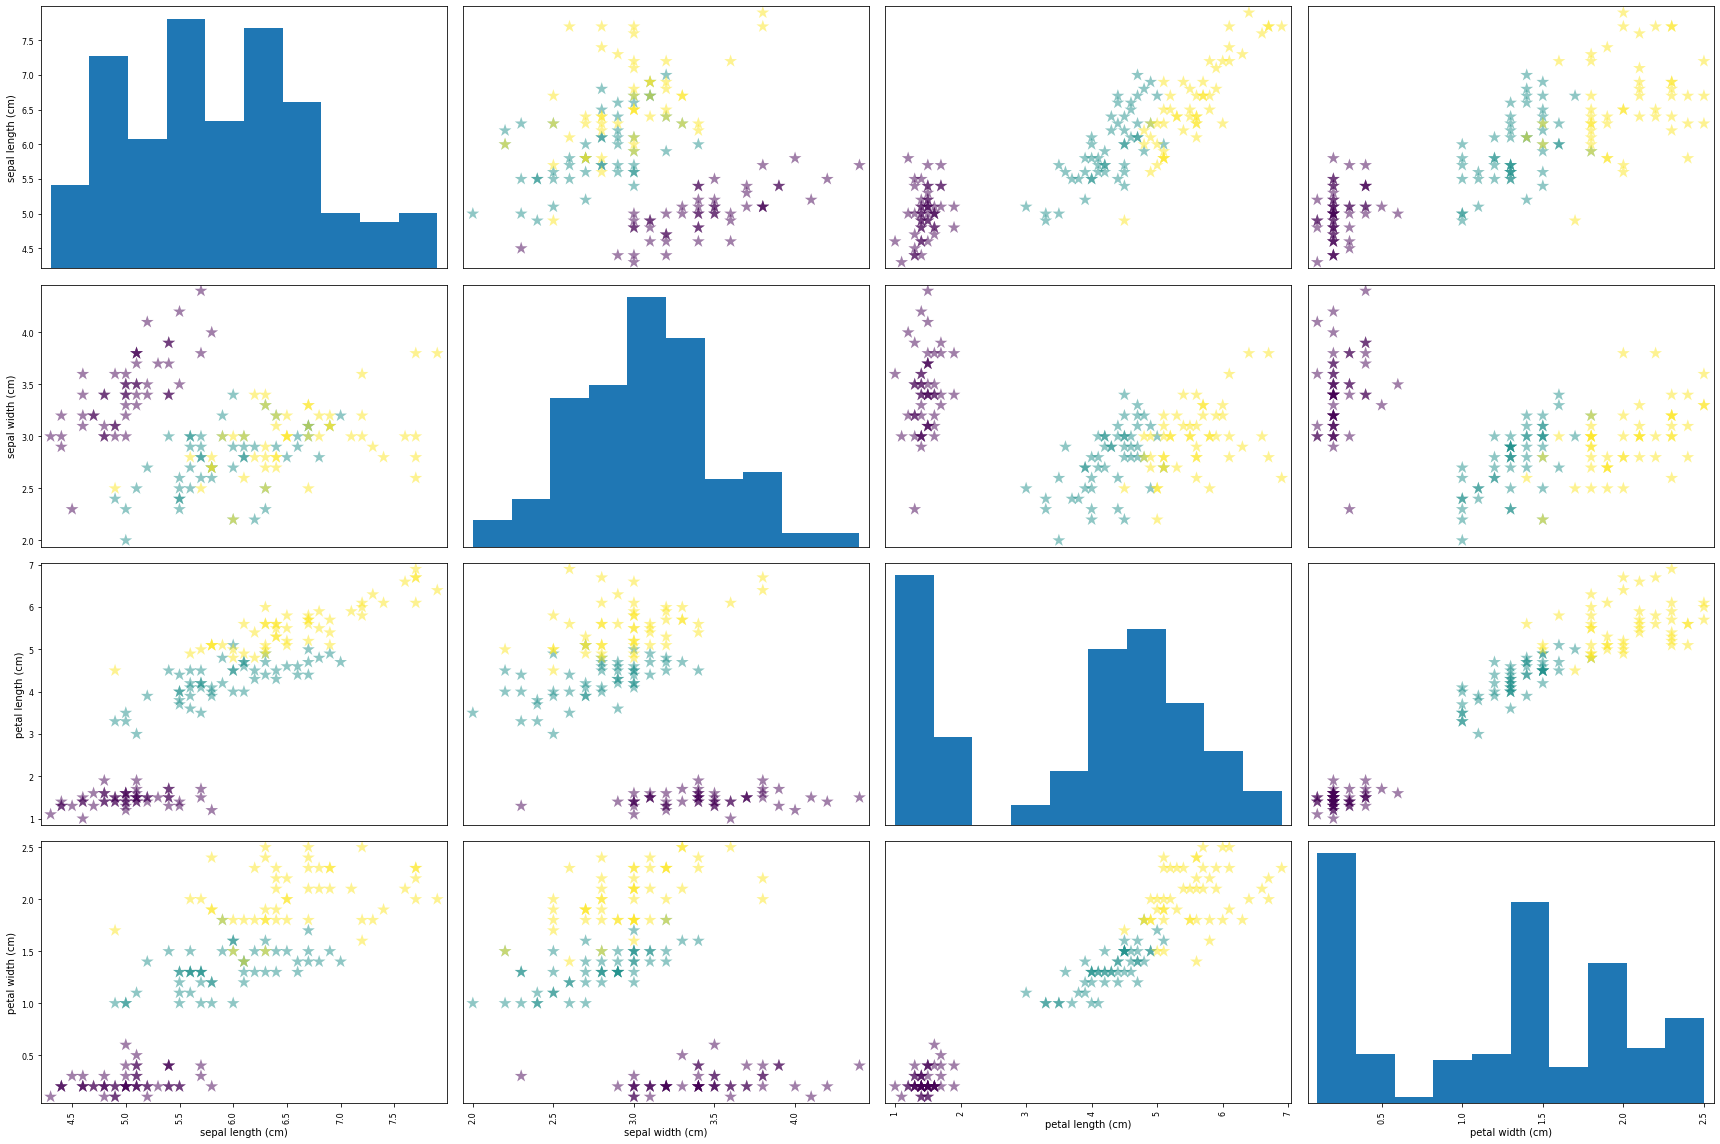

In [ ]:
scatter_matrix(X, figsize = (24, 16), c=y, s= 180, marker='*')
plt.tight_layout()

### 데이터 전처리

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [ ]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

### PCA 주성분 분석
---  
- iris의 4개 Feature 중에서 주성분 데이터 추출

In [ ]:
pca = PCA()

In [ ]:
pca.fit(X_scaled)

PCA()

In [ ]:
# 주성분 행렬 
pca.singular_values_

array([20.92306556, 11.7091661 ,  4.69185798,  1.76273239])

In [ ]:
# 주성분에 투영 후 분산 비율 정도 설명
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

### **주성분 갯수 지정**
---  
- 방법 1) pca.explained_variance_ratio_의 누적값에서 원하는 분포정도 지정해서 PC 갯수 계산
- 방법 2) n_components = 0.0 ~ 1.0 : 주성분 투영된 데이터 분포 정도 지정하면 PC 갯수 자동 계산

#### 방법 1) pca.explained_variance_ratio_의 누적값에서 원하는 분포정도 지정해서 PC 갯수 계산

In [ ]:
import numpy as np
cumsum = np.cumsum(pca.explained_variance_ratio_)
# 누적값이 0.95가 필요한 경우
d = np.argmax(cumsum >= 0.95) + 1 
print(f'주성분 갯수(차원) :  {d}')

주성분 갯수(차원) :  2


In [ ]:
# 지정된 PC 갯수로 주성분 데이터 압축/융합
pca2=PCA(n_components = d)
pca2.fit(X_scaled)
irisPCA2 = pca.transform(X_scaled)

In [ ]:
irisPCA2

array([[-2.26470281e+00,  4.80026597e-01, -1.27706022e-01,
        -2.41682039e-02],
       [-2.08096115e+00, -6.74133557e-01, -2.34608854e-01,
        -1.03006775e-01],
       [-2.36422905e+00, -3.41908024e-01,  4.42014848e-02,
        -2.83770534e-02],
       [-2.29938422e+00, -5.97394508e-01,  9.12901063e-02,
         6.59555596e-02],
       [-2.38984217e+00,  6.46835383e-01,  1.57381957e-02,
         3.59228133e-02],
       [-2.07563095e+00,  1.48917752e+00,  2.69682944e-02,
        -6.60818022e-03],
       [-2.44402884e+00,  4.76441976e-02,  3.35470401e-01,
         3.67755572e-02],
       [-2.23284716e+00,  2.23148073e-01, -8.86954979e-02,
         2.46120962e-02],
       [-2.33464048e+00, -1.11532768e+00,  1.45076864e-01,
         2.68592208e-02],
       [-2.18432817e+00, -4.69013561e-01, -2.53765567e-01,
         3.98992877e-02],
       [-2.16631010e+00,  1.04369065e+00, -2.68681102e-01,
        -1.67313672e-02],
       [-2.32613087e+00,  1.33078335e-01,  9.37592444e-02,
      

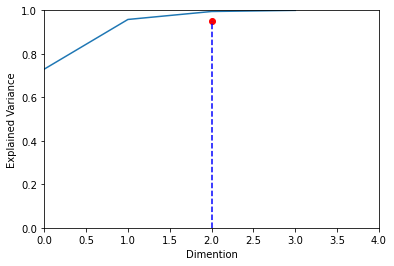

In [ ]:
# 주성분과 데이터 투영 분산 정도 시각화
plt.plot(cumsum)
plt.plot(d, 0.95, 'ro')
plt.plot([2.0, 2.0], [0, 0.95], 'b--')
plt.axis([0,4, 0, 1])
plt.xlabel("Dimention")
plt.ylabel("Explained Variance")
plt.show()

#### 방법 2) n_components = 0.0 ~ 1.0 : 주성분 투영된 데이터 분포 정도 지정하면 PC 갯수 자동 계산

In [ ]:
pca3=PCA(n_components=0.95)
pca3.fit(X_scaled)
pca3.explained_variance_, pca3.explained_variance_ratio_

(array([2.93808505, 0.9201649 ]), array([0.72962445, 0.22850762]))

In [ ]:
irisPCA3 = pca3.transform(X_scaled)
irisPCA3.shape

(150, 2)

In [ ]:
irisPCADF = pd.DataFrame(irisPCA3, columns=['pca_1', 'pca_2'])

In [ ]:
irisPCADF['target'] = y

In [ ]:
irisPCADF.head()

,pca_1,pca_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


In [ ]:
target_0 = irisPCADF[irisPCADF['target'] == 0]
target_1 = irisPCADF[irisPCADF['target'] == 1]
target_2 = irisPCADF[irisPCADF['target'] == 2]

####  되돌리기

In [ ]:
re = pca3.inverse_transform(irisPCA3)

In [ ]:
re.shape

(150, 4)